## Run Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

## Load Data

In [2]:
Dataset = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv"

In [3]:
Df = pd.read_csv(Dataset)

In [4]:
Df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


## Data Analysis Part

In [5]:
Df.shape

(244, 7)

In [6]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [7]:
Df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


## Check For Null Values

In [8]:
Df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [9]:
Df['time'].value_counts()

time
Dinner    176
Lunch      68
Name: count, dtype: int64

In [10]:
Df['sex'].value_counts()

sex
Male      157
Female     87
Name: count, dtype: int64

## Data Visualization Part

<Axes: xlabel='sex', ylabel='count'>

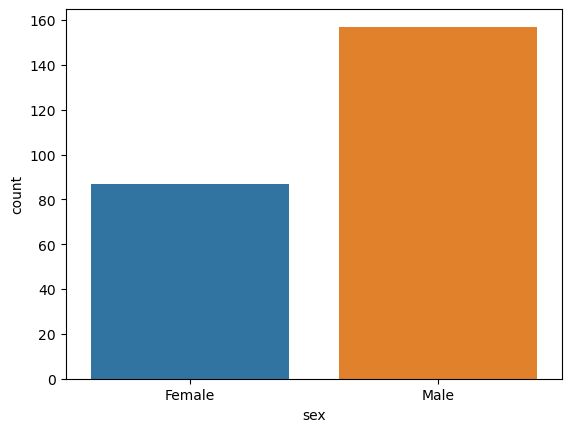

In [11]:
sns.countplot(x=Df['sex'])

Text(0.5, 1.0, "Total Bill VS Tip on that's bill")

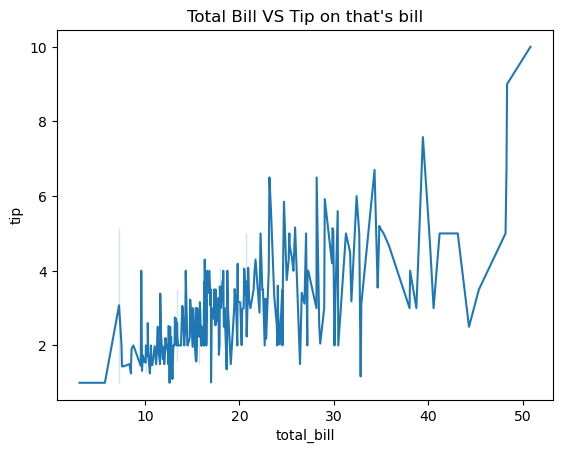

In [13]:
sns.lineplot(x=Df['total_bill'], y=Df['tip'])
plt.title("Total Bill VS Tip on that's bill")

## Using Label Encoding Convert Data to Binary (0 And 1)

In [14]:
# Encode categorical variables
label_encoder = LabelEncoder()
Df['sex'] = label_encoder.fit_transform(Df['sex'])
Df['smoker'] = label_encoder.fit_transform(Df['smoker'])
Df['day'] = label_encoder.fit_transform(Df['day'])
Df['time'] = label_encoder.fit_transform(Df['time'])

In [15]:
Df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3
3,23.68,3.31,1,0,2,0,2
4,24.59,3.61,0,0,2,0,4
...,...,...,...,...,...,...,...
239,29.03,5.92,1,0,1,0,3
240,27.18,2.00,0,1,1,0,2
241,22.67,2.00,1,1,1,0,2
242,17.82,1.75,1,0,1,0,2


## Divide Data Into Train And Test

In [16]:
X = Df.drop(['total_bill'], axis=1)

In [17]:
y=Df['total_bill']

In [18]:
X

,tip,sex,smoker,day,time,size
0,1.01,0,0,2,0,2
1,1.66,1,0,2,0,3
2,3.50,1,0,2,0,3
3,3.31,1,0,2,0,2
4,3.61,0,0,2,0,4
...,...,...,...,...,...,...
239,5.92,1,0,1,0,3
240,2.00,0,1,1,0,2
241,2.00,1,1,1,0,2
242,1.75,1,0,1,0,2


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Train Model Using Linear Regression Model

In [20]:
lir = LinearRegression() 

In [21]:
# Fit the linear regression model
lir.fit(X_train, y_train)

LinearRegression()

In [22]:
# Check score of the model.
lir.score(X_test, y_test)

0.7276068693748916

In [23]:
# Predict the score if student study hours is 10 hours.
lir.predict([[1.01, 0, 0, 2, 0,  2]])

array([11.17133036])

## Save Model

In [25]:
# Here we save our model in pickle file using joblib library
import joblib as jbl

In [26]:
# Now, we are saving the model as a pickle in a file  
jbl.dump(lir, 'Trained_Model.pkl')

['Trained_Model.pkl']

In [27]:
# Here we load our model from pkl file using joblib
# Here, we are loading the model from the file  
lir = jbl.load('Trained_Model.pkl')

In [28]:
# Here we predict our outputs using pkl file
# At last we will use the loaded pickled model for making predictions  
y_pred=lir.predict(X_test)

In [29]:
# Find mean squared error in the data.
print('Mean squared error = ',mean_squared_error(y_test, y_pred))

Mean squared error =  15.945588573201796


## See Actual Value Vs Predicted Value

In [30]:
# Create a dataframe for the actual score and predicted scores
data = {'Actual score': y_test, 'Predicted score': y_pred}
df = pd.DataFrame(data)
display(df)

,Actual score,Predicted score
64,17.59,20.076503
63,18.29,29.901423
55,19.49,19.286080
111,7.25,7.350546
225,16.27,16.512742
92,5.75,13.601576
76,17.92,20.627845
181,23.33,28.591630
188,18.15,25.143944
180,34.65,29.842297


In [31]:
# Find r^2 score
from sklearn.metrics import r2_score
print('r^2 score error =',r2_score(y_test, y_pred))

r^2 score error = 0.7276068693748916


In [32]:
# Find max error in the data.
from sklearn.metrics import max_error
print('Max Error:',max_error(y_test, y_pred))

Max Error: 11.611422991376418


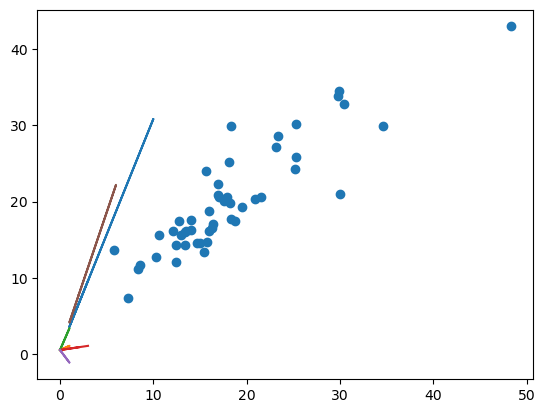

In [39]:
# Plotting the regression line
line = lir.coef_*X+lir.intercept_
# Plotting for the test data
plt.scatter(y_test, y_pred)
plt.plot(X, line);
plt.show()